# Hillslope erosion

We consider the problem of hill slope erosion with the diffusion equation: $$\frac{\partial h}{\partial t} = \frac{\partial^2 h}{\partial x^2}$$

and we consider the boundary condition: $$ h(x=0,2L,t)=0$$ 
which implies that the sediment thickness remains fixed at zero at the bounds of the initial hill slope. The initial condition is a triangular hill

$ h(t=0,0<x<L) = H_{max} x / L$

$ h(t=0,L<x<2L) = H_{max} [1- (x-L)/ L]$


In [26]:
#lets import some packages
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Set parameters

In [52]:
D = 0.1
L = 10
H_max_init = 20

dx = 2*L/201
C_D = 0.5
dt = (dx**2)*C_D/D

tf = 100

m = 202
n = round(tf/dt) + 1

x = np.linspace(0,2*L,m)
t = np.linspace(0,tf,n)

## Pre-allocate vectors

In [53]:
h = np.zeros(m)
h_all = np.zeros([m,n])

## Create advection evolution matrix (inc BCs)

In [54]:
from scipy.sparse import dia_matrix
M = dia_matrix((m, m), dtype=np.double).toarray()
for i in np.arange(0,m):
    for j in np.arange(0,m):
        if i==j:
            M[i,j] = 1-2*C_D
        elif i-1==j:
            M[i,j] = C_D
        elif i+1==j:
            M[i,j] = C_D

## Initial condition

In [55]:
x1 = (x<L) 
x2 = (x>L) 
h[x1] = H_max_init*x[x1]/L
h[x2] = H_max_init*(1 - (x[x2]-L)/L)

h_all[:,0] = h.transpose()

## Run model loop!

In [56]:
for k in np.arange(0,n):
    hnew = np.matmul(M,h)
    
    h_all[:,k] = hnew.transpose()
    h = hnew

## Plot stuff

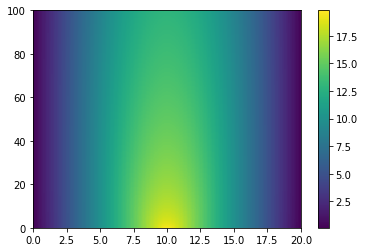

In [57]:
plt.pcolor(x,t,h_all.transpose())
plt.colorbar()